In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('DataProject.csv')

In [3]:
df

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [5]:
df["Flood?"].fillna(0, inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['Sl','Station_Names','Period','X_COR','Y_COR','ALT','Period','Station_Number','Year','Month'],axis=1,inplace=True)

In [8]:
df["Min_Temp"] = (df["Min_Temp"] - df["Min_Temp"].mean()) / df["Min_Temp"].std()
df["Rainfall"] = (df["Rainfall"] - df["Rainfall"].mean()) / df["Rainfall"].std()
df["Relative_Humidity"] = (df["Relative_Humidity"] - df["Relative_Humidity"].mean()) / df["Relative_Humidity"].std()
df["Wind_Speed"] = (df["Wind_Speed"] - df["Wind_Speed"].mean()) / df["Wind_Speed"].std()
df["Cloud_Coverage"] = (df["Cloud_Coverage"] - df["Cloud_Coverage"].mean()) / df["Cloud_Coverage"].std()
df["Bright_Sunshine"] = (df["Bright_Sunshine"] - df["Bright_Sunshine"].mean()) / df["Bright_Sunshine"].std()
df["LATITUDE"] = (df["LATITUDE"] - df["LATITUDE"].mean()) / df["LATITUDE"].std()
df["LONGITUDE"] = (df["LONGITUDE"] - df["LONGITUDE"].mean()) / df["LONGITUDE"].std()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [10]:
# Split the data into features and target
X = df.drop(columns=["Flood?"])
y = df["Flood?"]
y=y.astype('int')

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc_score)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)

Accuracy: 0.9707958140666829
AUC: 0.9929393923986835
Recall: 0.9008464328899637
F1 Score: 0.9254658385093167
MCC: 0.9078472164809889


feature importance

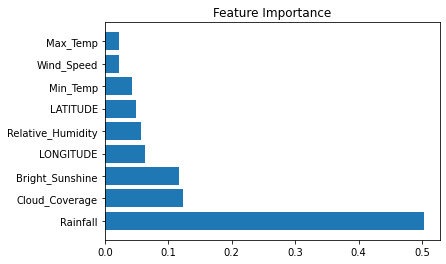

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X.shape[1]), importances[indices])

# Add feature names as y-axis labels
plt.yticks(range(X.shape[1]), names)

# Show plot
plt.show()

LR feature importance 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Extract the feature importance
importance = logreg.coef_[0]

# Create a list of feature importance and feature names
feature_importance = pd.DataFrame(list(zip(X.columns, importance)), columns=['Feature', 'Importance'])

# Print the feature importance
print(feature_importance)


             Feature  Importance
0           Max_Temp   -0.113757
1           Min_Temp    0.433832
2           Rainfall    4.810172
3  Relative_Humidity    0.100269
4         Wind_Speed   -0.104612
5     Cloud_Coverage    0.015007
6    Bright_Sunshine   -0.013960
7           LATITUDE   -0.184583
8          LONGITUDE   -0.944224


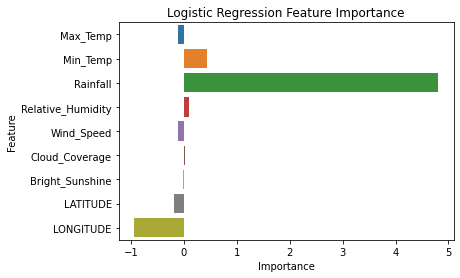

In [14]:
import seaborn as sns
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.title('Logistic Regression Feature Importance')
plt.show()